In [62]:
#Experiment was run with a c6220 Node.

import pandas as pd

df = pd.read_csv("./results.csv")
df['Poll Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 1) != 0 else 1)
df['C1 Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 2) != 0 else 1)
df['C1E Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 4) != 0 else 1)
df['C3 Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 8) != 0 else 1)
df['C6 Enabled'] = df['STATE'].apply(lambda x: 0 if (x & 16) != 0 else 1)
display(df)

,STATE,CORE_ENERGY,PKG_ENERGY,RAM_ENERGY,POLL_RES,C1_RES,C1E_RES,C3_RES,C6_RES,Poll Enabled,C1 Enabled,C1E Enabled,C3 Enabled,C6 Enabled
0,0,86.37,330.36,289.38,186510278,427420,243260,175729,31832837,1,1,1,1,1
1,1,79.42,305.70,283.77,186510278,427544,243376,175944,31849102,0,1,1,1,1
2,2,79.38,301.78,280.14,186510554,427719,243634,176156,31865441,1,0,1,1,1
3,3,79.63,301.31,285.38,186510559,427719,243853,176342,31881830,0,0,1,1,1
4,4,73.68,287.25,285.13,186510571,428166,243919,176564,31896939,1,1,0,1,1
5,5,78.54,304.13,288.33,186510571,428525,243919,176776,31913252,0,1,0,1,1
6,6,80.77,308.52,289.19,186510722,428567,243919,177006,31929579,1,0,0,1,1
7,7,78.62,299.58,284.97,186510735,428567,243919,177435,31945516,0,0,0,1,1
8,8,80.27,307.76,286.13,186510754,429048,244135,177654,31961327,1,1,1,0,1
9,9,82.00,311.52,289.33,186510754,429329,244445,177654,31977850,0,1,1,0,1


<Figure size 640x480 with 0 Axes>

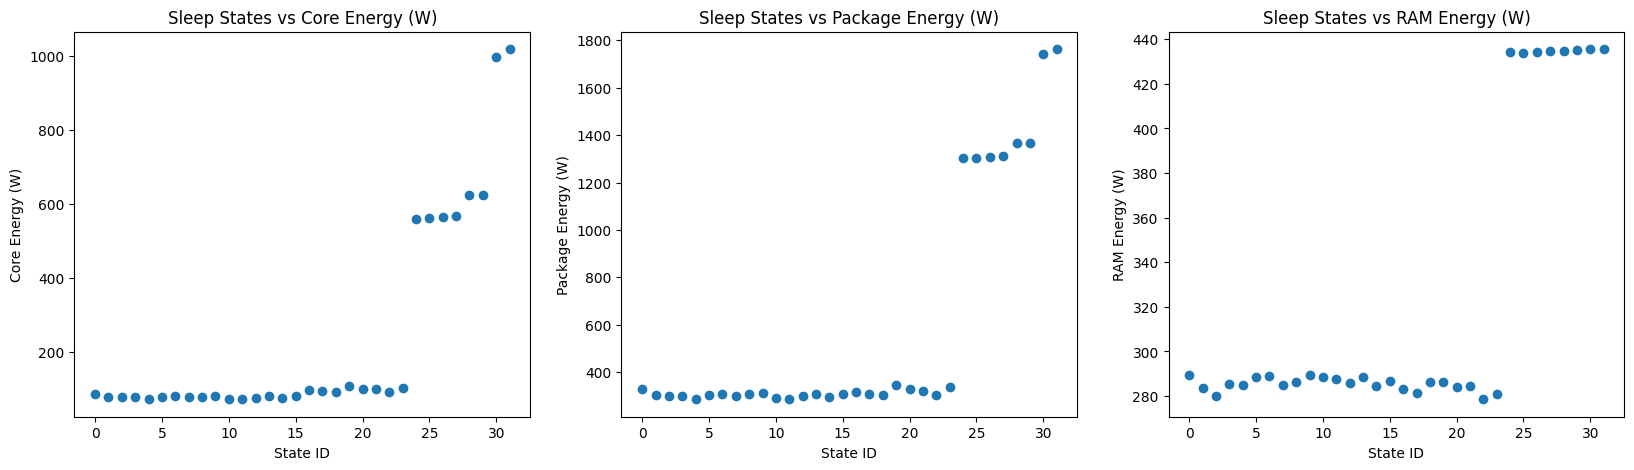

In [63]:
import matplotlib.pyplot as plt
plt.figure()

fig, plots = plt.subplots(1, 3, figsize=(20, 5))

plots[0].scatter(df['STATE'], df['CORE_ENERGY'])
plots[0].set_xlabel("State ID")
plots[0].set_ylabel("Core Energy (W)")
plots[0].set_title("Sleep States vs Core Energy (W)")

plots[1].scatter(df['STATE'], df['PKG_ENERGY'])
plots[1].set_xlabel("State ID")
plots[1].set_ylabel("Package Energy (W)")
plots[1].set_title("Sleep States vs Package Energy (W)")

plots[2].scatter(df['STATE'], df['RAM_ENERGY'])
plots[2].set_xlabel("State ID")
plots[2].set_ylabel("RAM Energy (W)")
plots[2].set_title("Sleep States vs RAM Energy (W)")

plt.show()

In [64]:
# Obtaining the differences between values in residency

df2 = df[['POLL_RES', 'C1_RES', 'C1E_RES', 'C3_RES', 'C6_RES']]
enabledCols = ['Poll Enabled', 'C1 Enabled', 'C1E Enabled', 'C3 Enabled', 'C6 Enabled']
df2 = df2.diff()
df2[enabledCols] = df[enabledCols]
display(df2)

,POLL_RES,C1_RES,C1E_RES,C3_RES,C6_RES,Poll Enabled,C1 Enabled,C1E Enabled,C3 Enabled,C6 Enabled
0,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1
1,0.0,124.0,116.0,215.0,16265.0,0,1,1,1,1
2,276.0,175.0,258.0,212.0,16339.0,1,0,1,1,1
3,5.0,0.0,219.0,186.0,16389.0,0,0,1,1,1
4,12.0,447.0,66.0,222.0,15109.0,1,1,0,1,1
5,0.0,359.0,0.0,212.0,16313.0,0,1,0,1,1
6,151.0,42.0,0.0,230.0,16327.0,1,0,0,1,1
7,13.0,0.0,0.0,429.0,15937.0,0,0,0,1,1
8,19.0,481.0,216.0,219.0,15811.0,1,1,1,0,1
9,0.0,281.0,310.0,0.0,16523.0,0,1,1,0,1


<Figure size 640x480 with 0 Axes>

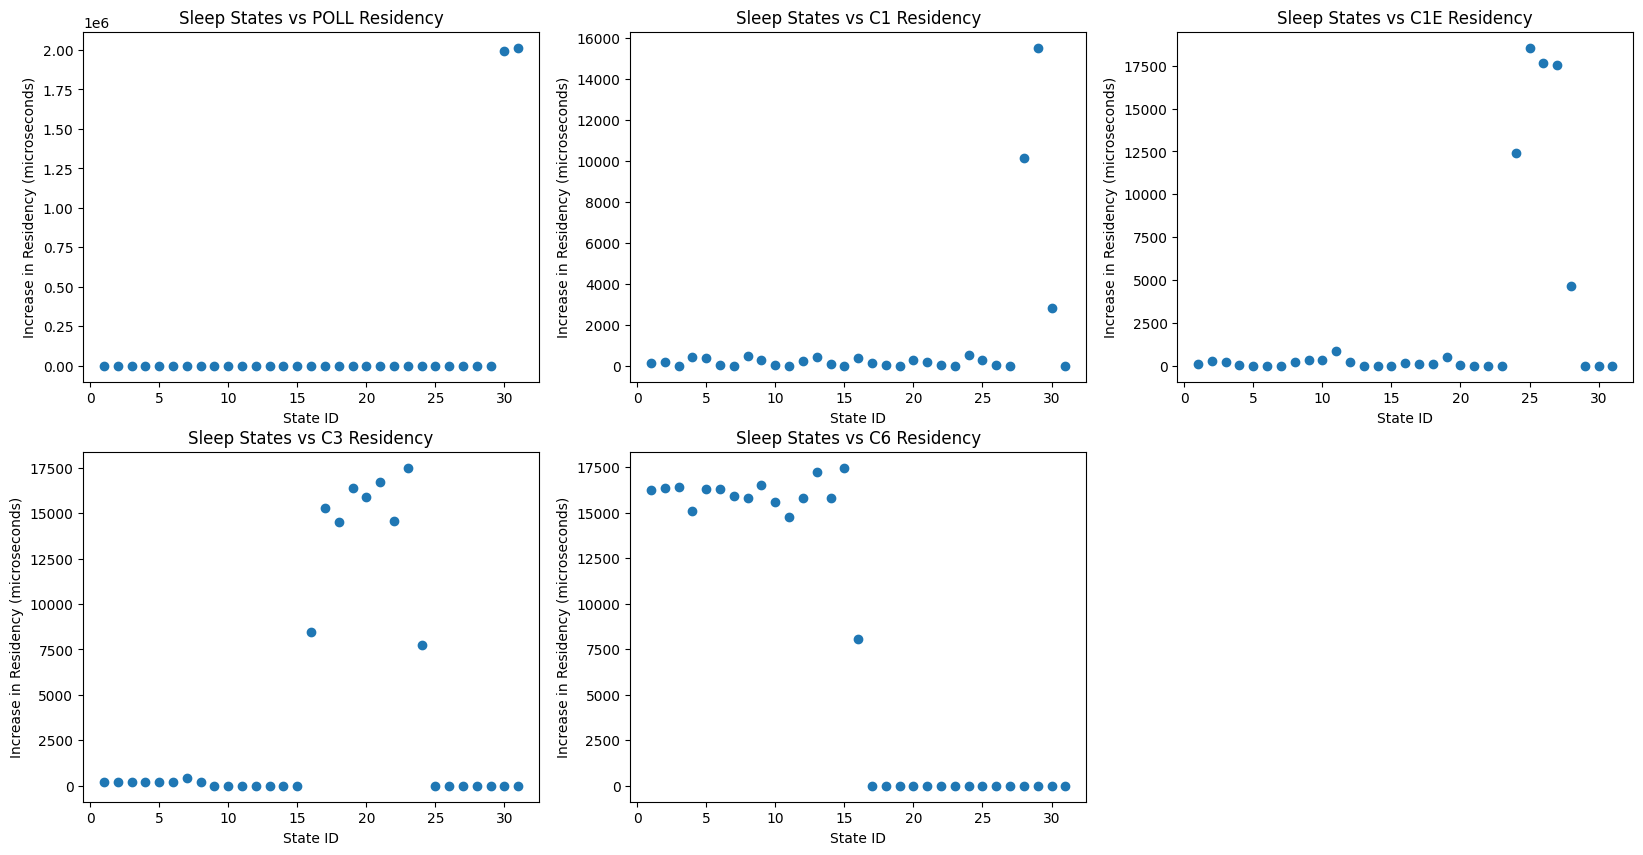

In [65]:
plt.figure()

fig, plots = plt.subplots(2, 3, figsize=(20, 10))

plots[0,0].scatter(df['STATE'], df2['POLL_RES'])
plots[0,0].set_xlabel("State ID")
plots[0,0].set_ylabel("Increase in Residency (microseconds)")
plots[0,0].set_title("Sleep States vs POLL Residency")

plots[0,1].scatter(df['STATE'], df2['C1_RES'])
plots[0,1].set_xlabel("State ID")
plots[0,1].set_ylabel("Increase in Residency (microseconds)")
plots[0,1].set_title("Sleep States vs C1 Residency")

plots[0,2].scatter(df['STATE'], df2['C1E_RES'])
plots[0,2].set_xlabel("State ID")
plots[0,2].set_ylabel("Increase in Residency (microseconds)")
plots[0,2].set_title("Sleep States vs C1E Residency")

plots[1,0].scatter(df['STATE'], df2['C3_RES'])
plots[1,0].set_xlabel("State ID")
plots[1,0].set_ylabel("Increase in Residency (microseconds)")
plots[1,0].set_title("Sleep States vs C3 Residency")

plots[1,1].scatter(df['STATE'], df2['C6_RES'])
plots[1,1].set_xlabel("State ID")
plots[1,1].set_ylabel("Increase in Residency (microseconds)")
plots[1,1].set_title("Sleep States vs C6 Residency")

fig.delaxes(plots[1,2])
plt.show()